In [ ]:
# DOWNLOADS THE DATA FROM THE ECMWF

from ecmwfapi import ECMWFDataServer
    
server = ECMWFDataServer()
    
server.retrieve({
    'stream'    : "oper",
    'levtype'   : "sfc",
    'param'     : "151.128",
    'dataset'   : "interim",
    'step'      : "0",
    'area'      : "-25/155/-55/-170",
    'grid'      : "0.75/0.75",
    'time'      : "00/06/12/18",
    'date'      : "2000-01-01/to/2019-01-01",
    'type'      : "an",
    'class'     : "ei",
    'format'    : "netcdf",
    'target'    : "interim_2000_01_01to2019_01_01.nc"
 })

In [103]:
import numpy as np
import os as os
import sys as sys
from numpy import ma
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import xarray as xr
from sklearn.decomposition import PCA as pca
from sklearn import preprocessing
import cartopy.crs as ccrs
import cartopy.feature as cfeat

In [4]:
from datetime import datetime, timedelta

In [6]:
from IPython.display import Image

In [21]:
np.random.seed(42)

In [123]:
dset = xr.open_mfdataset('interim_2000_01_01to2019_01_01.nc')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [124]:
dset

<xarray.Dataset>
Dimensions:    (latitude: 41, longitude: 47, time: 27764)
Coordinates:
  * longitude  (longitude) float32 155.0 155.75 156.5 ... 188.0 188.75 189.5
  * latitude   (latitude) float32 -25.0 -25.75 -26.5 ... -53.5 -54.25 -55.0
  * time       (time) datetime64[ns] 2000-01-01 ... 2019-01-01T18:00:00
Data variables:
    msl        (time, latitude, longitude) float32 dask.array<chunksize=(27764, 41, 47), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-31 19:29:51 GMT by grib_to_netcdf-2.16.0: grib_to_n...

In [288]:
dset = dset.sel(time=slice('2000-1-1','2018-12-31'))

In [304]:
dsetm = dset.mean('time')/100
msl = dset['msl'].values/100

In [184]:
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [185]:
lat = dset.latitude
lon = dset.longitude

In [186]:
lons, lats = np.meshgrid(lon, lat)

In [187]:
central_longitude = 180.

In [188]:
proj = ccrs.PlateCarree(central_longitude=central_longitude)


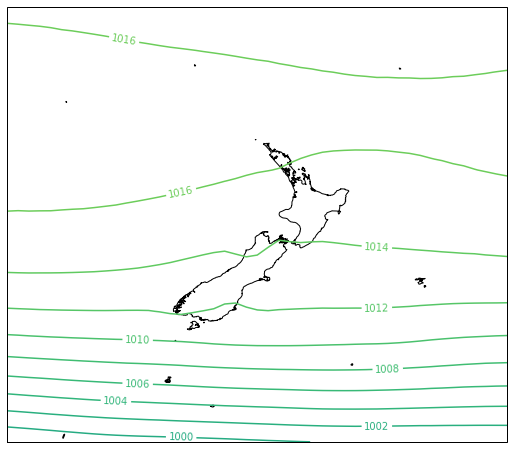

In [189]:
f, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection':proj})

ax.coastlines('10m')

c = ax.contour(lons - central_longitude, lats, dsetm['msl'], np.arange(940, 1040, 2))

plt.clabel(c, fmt='%i')

ax.set_extent([lon.data.min() - central_longitude, lon.data.max() - central_longitude, lat.data.min(), lat.data.max()], crs=proj)

In [190]:
def make_map(X, lons, lats, vmin=930, vmax=1040, step=2, ax=None, central_longitude=180., fmt='%i'): 
    
    from numpy import ma
    
    if not(ax): 
        central_longitude = 180.
        proj = ccrs.PlateCarree(central_longitude=central_longitude)
        f, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection':proj})
        
    proj = ccrs.PlateCarree(central_longitude=central_longitude)
    
    ax.coastlines('10m')
            
    if X.min() < 0 and X.max() > 0: 
        p = ax.contour(lons - central_longitude, lats, ma.masked_less(X,0), np.arange(0, vmax + step, step), colors='r')
        n = ax.contour(lons - central_longitude, lats, ma.masked_greater(X,0), np.arange(vmin, 0, step), colors='b')
        
        ax.contour(lons - central_longitude, lats, X, np.array([0]), colors='k')
        
        plt.clabel(p, fmt=fmt)
        plt.clabel(n, fmt=fmt) 
    elif X.min() < 0 and X.max() < 0: 
        n = ax.contour(lons - central_longitude, lats, X, np.arange(vmin, vmax + step, step), colors='b')
        plt.clabel(n, fmt=fmt)
    else: 
        p = ax.contour(lons - central_longitude, lats, X, np.arange(vmin, vmax + step, step), colors='r')
        plt.clabel(p, fmt=fmt)        
                            
    ax.set_extent([lon.data.min() - central_longitude, lon.data.max() - central_longitude, lat.data.min(), lat.data.max()], crs=proj)

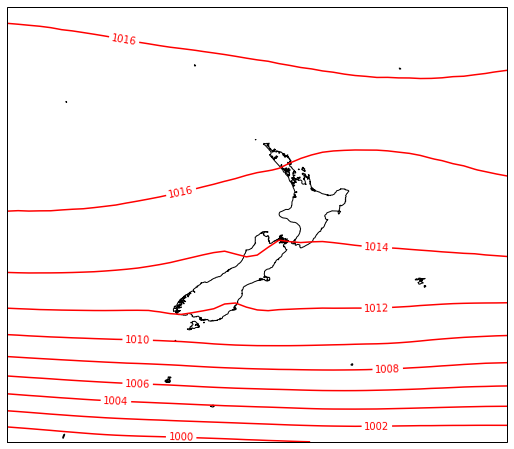

In [191]:
make_map(dsetm['msl'].data, lons, lats)

In [285]:
dset

<xarray.Dataset>
Dimensions:    (latitude: 41, longitude: 47, time: 27760)
Coordinates:
  * longitude  (longitude) float32 155.0 155.75 156.5 ... 188.0 188.75 189.5
  * latitude   (latitude) float32 -25.0 -25.75 -26.5 ... -53.5 -54.25 -55.0
  * time       (time) datetime64[ns] 2000-01-01 ... 2018-12-31T18:00:00
Data variables:
    msl        (time, latitude, longitude) float32 dask.array<chunksize=(27760, 41, 47), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-31 19:29:51 GMT by grib_to_netcdf-2.16.0: grib_to_n...

In [249]:
msl_stacked = msl.stack(latlon=('latitude', 'longitude'))

In [250]:
msl_stacked

<xarray.DataArray 'msl' (time: 27760, latlon: 1927)>
dask.array<reshape, shape=(27760, 1927), dtype=float32, chunksize=(27760, 1927), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 ... 2018-12-31T18:00:00
  * latlon     (latlon) MultiIndex
  - latitude   (latlon) float64 -25.0 -25.0 -25.0 -25.0 ... -55.0 -55.0 -55.0
  - longitude  (latlon) float64 155.0 155.8 156.5 157.2 ... 188.0 188.8 189.5

In [251]:
msl.shape

(27760, 41, 47)

In [252]:
msl_stacked.shape

(27760, 1927)

In [253]:
type(msl_stacked.data)

dask.array.core.Array

In [254]:
msl_stacked.load()

<xarray.DataArray 'msl' (time: 27760, latlon: 1927)>
array([[1008.2446 , 1008.5234 , 1008.7251 , ..., 1005.31604, 1005.7177 ,
        1006.2031 ],
       [1006.67377, 1006.9213 , 1007.23126, ..., 1005.0192 , 1004.729  ,
        1004.5404 ],
       [1009.99255, 1010.214  , 1010.34515, ..., 1005.24384, 1005.12085,
        1004.9093 ],
       ...,
       [1012.449  , 1012.43915, 1012.4244 , ...,  994.2558 ,  993.46375,
         992.5865 ],
       [1013.951  , 1013.90015, 1013.89197, ...,  998.2273 ,  997.5419 ,
         996.8564 ],
       [1012.6113 , 1012.55554, 1012.52765, ..., 1000.75415, 1000.0868 ,
         999.4243 ]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 ... 2018-12-31T18:00:00
  * latlon     (latlon) MultiIndex
  - latitude   (latlon) float64 -25.0 -25.0 -25.0 -25.0 ... -55.0 -55.0 -55.0
  - longitude  (latlon) float64 155.0 155.8 156.5 157.2 ... 188.0 188.8 189.5

In [255]:
type(msl_stacked.data)

numpy.ndarray

In [256]:
X = msl_stacked.data

In [257]:
X.shape

(27760, 1927)

In [258]:
type(X)

numpy.ndarray

In [259]:
from sklearn.preprocessing import StandardScaler

In [260]:
scaler  = StandardScaler()

In [261]:
scaler = scaler.fit(X)

In [262]:
X = scaler.transform(X)

In [263]:
X.shape

(27760, 1927)

In [264]:
X.mean(0)

array([-6.318393e-08, -8.127360e-08,  8.208522e-09, ..., -1.837121e-08,
       -2.370335e-08, -3.625636e-08], dtype=float32)

In [265]:
X.mean()

5.026027e-10

In [266]:
X.std(0)

array([0.9999987, 0.9999977, 0.999999 , ..., 0.9999985, 0.9999978,
       0.9999992], dtype=float32)

In [267]:
from sklearn.decomposition import pca

In [268]:
skpca = pca.PCA()

In [269]:
skpca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

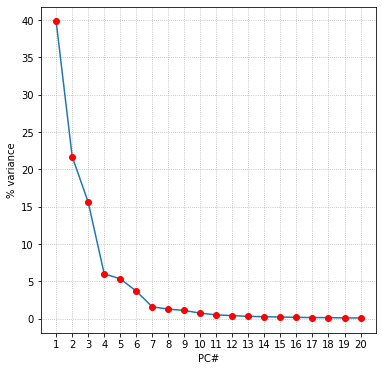

In [270]:
f, ax = plt.subplots(figsize=(6,6))
ax.plot(range(1,21), skpca.explained_variance_ratio_[0:20]*100)
ax.plot(range(1,21), skpca.explained_variance_ratio_[0:20]*100,'ro')
ax.grid(ls=':')
ax.set_xticks(range(1,21)); 
ax.set_xlabel('PC#');
ax.set_ylabel("% variance");

In [271]:
ipc = 6

In [272]:
skpca.explained_variance_ratio_[:ipc].sum()

0.9215721

In [273]:
PCs = skpca.transform(X)

In [274]:
PCs = PCs[:,:ipc]
PCs.shape

(27760, 6)

In [275]:
type(PCs)

numpy.ndarray

In [ ]:
#THE EOF'S CONTAIN THE SPATIAL PATTERNS OF THE PCA's

In [276]:
EOFs = skpca.components_

In [277]:
EOFs = EOFs[:ipc,:]

In [278]:
EOFs.shape

(6, 1927)

In [279]:
EOFs_r = EOFs.reshape((ipc, len(lat), len(lon)))

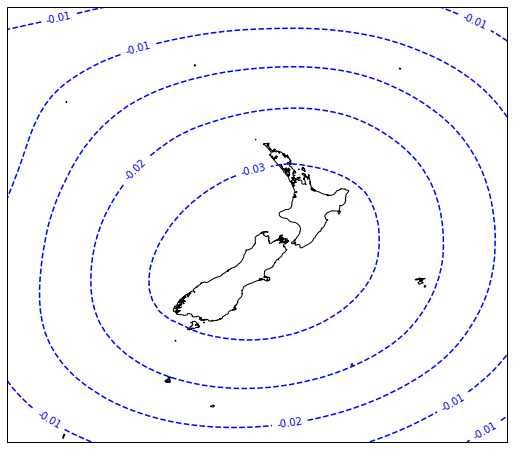

In [280]:
make_map(EOFs_r[0,:,:], lons, lats, vmin=-1, vmax=1, step=0.005, fmt='%4.2f')

In [303]:
dset['time']
dset.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2018-12-31T18:00:00

In [331]:
working_index = dset['time']


In [330]:
PCdf = pd.DataFrame(PCs, columns = ["PC%s" % (x) for x in range(1, PCs.shape[1] +1)])

In [327]:
PCdf

,PC1,PC2,PC3,PC4,PC5,PC6
0,22.009424,-23.243109,-7.197646,-6.475392,-2.399224,-1.526456
1,27.792969,-23.793526,-6.033435,-6.581499,-0.023333,-2.425164
2,22.840147,-15.212883,-3.612205,-6.378440,-3.060341,-5.511753
3,24.790981,-15.074917,-0.488905,-8.253706,-2.682226,-6.579717
4,18.244205,-8.591633,5.673406,-8.664369,-5.879593,-8.073815
...,...,...,...,...,...,...
27755,-5.501846,-0.148116,4.349257,1.500174,11.157384,0.745760
27756,-7.410460,-1.893034,8.322602,4.359984,7.736204,1.488382
27757,0.309992,-10.365610,7.597955,6.915901,7.928992,3.959911
27758,-1.956210,-9.471197,5.505991,11.392694,4.716093,4.059923


In [309]:
PCdf = pd.DataFrame(data = PCs,
                    index = dset['time'],
                    columns = ["PC%s" % (x) for x in range(1, PCs.shape[1] +1)])

AssertionError: <class 'xarray.core.dataarray.DataArray'>